# Financial Risks - with DataFrames, PyTorch, Pandas

In [1]:
import numpy as np
import datetime as dt
import pandas as pd
import pandas_datareader as pdr

In [4]:
ticker = 'AAPL'
start = dt.datetime(2020,1,1)

data = pdr.get_data_yahoo(ticker, start)

In [5]:
data.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-02,75.150002,73.797501,74.059998,75.087502,135480400.0,73.683563
2020-01-03,75.144997,74.125000,74.287498,74.357498,146322800.0,72.967216
2020-01-06,74.989998,73.187500,73.447502,74.949997,118387200.0,73.548622
2020-01-07,75.224998,74.370003,74.959999,74.597504,108872000.0,73.202721
2020-01-08,76.110001,74.290001,74.290001,75.797501,132079200.0,74.380287


## NumPy

In [7]:
data.to_numpy()

array([[7.51500015e+01, 7.37975006e+01, 7.40599976e+01, 7.50875015e+01,
        1.35480400e+08, 7.36835632e+01],
       [7.51449966e+01, 7.41250000e+01, 7.42874985e+01, 7.43574982e+01,
        1.46322800e+08, 7.29672165e+01],
       [7.49899979e+01, 7.31875000e+01, 7.34475021e+01, 7.49499969e+01,
        1.18387200e+08, 7.35486221e+01],
       ...,
       [1.56669998e+02, 1.53610001e+02, 1.54820007e+02, 1.55960007e+02,
        8.74496000e+07, 1.55960007e+02],
       [1.56360001e+02, 1.52679993e+02, 1.54639999e+02, 1.54460007e+02,
        8.49238000e+07, 1.54460007e+02],
       [1.57820007e+02, 1.54750000e+02, 1.55470001e+02, 1.57369995e+02,
        6.80288000e+07, 1.57369995e+02]])

In [8]:
arr = data.to_numpy()

In [13]:
arr[0]

array([7.51500015e+01, 7.37975006e+01, 7.40599976e+01, 7.50875015e+01,
       1.35480400e+08, 7.36835632e+01])

In [12]:
data.head(1)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-02,75.150002,73.797501,74.059998,75.087502,135480400.0,73.683563


In [15]:
arr.dtype  #NumPy array has only 1 data type

dtype('float64')

In [16]:
small = arr[:10, 0].copy()

In [17]:
small

array([75.15000153, 75.14499664, 74.98999786, 75.22499847, 76.11000061,
       77.60749817, 78.16750336, 79.26750183, 79.39250183, 78.875     ])

In [18]:
np.max(small)

79.39250183105469

In [20]:
small.max()   #called directly on numpy dataframe

79.39250183105469

In [22]:
small.argmax()   #gets index of max value

8

In [25]:
np.log(data)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-02,4.319486,4.301325,4.304876,4.318654,18.724338,4.299780
2020-01-03,4.319420,4.305753,4.307943,4.308885,18.801326,4.290010
2020-01-06,4.317355,4.293025,4.296571,4.316821,18.589471,4.297947
2020-01-07,4.320484,4.309053,4.316955,4.312107,18.505683,4.293233
2020-01-08,4.332180,4.307976,4.307976,4.328065,18.698912,4.309191
...,...,...,...,...,...,...
2022-09-02,5.077421,5.043232,5.073610,5.048637,18.158084,5.048637
2022-09-06,5.056819,5.034938,5.052864,5.040388,18.115714,5.040388
2022-09-07,5.054142,5.034417,5.042263,5.049600,18.286573,5.049600


In [29]:
data/data.shift()  #shifts by desired number of periods, here is shift previous

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-02,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-03,0.999933,1.004438,1.003072,0.990278,1.080029,0.990278
2020-01-06,0.997937,0.987352,0.988693,1.007968,0.809082,1.007968
2020-01-07,1.003134,1.016157,1.020593,0.995297,0.919626,0.995297
2020-01-08,1.011765,0.998924,0.991062,1.016086,1.213160,1.016086
...,...,...,...,...,...,...
2022-09-02,1.012246,1.001940,1.019854,0.986389,1.036041,0.986389
2022-09-06,0.979608,0.991740,0.979468,0.991785,0.958515,0.991785
2022-09-07,0.997326,0.999479,0.989455,1.009254,1.186324,1.009254


In [28]:
np.sum(np.log(data/data.shift()))

High         0.741969
Low          0.740486
Open         0.741577
Close        0.739946
Volume      -0.688896
Adj Close    0.758820
dtype: float64

In [30]:
small.reshape(10,1)

array([[75.15000153],
       [75.14499664],
       [74.98999786],
       [75.22499847],
       [76.11000061],
       [77.60749817],
       [78.16750336],
       [79.26750183],
       [79.39250183],
       [78.875     ]])

In [31]:
small.reshape(-1,1)  #is the same as previous because '-1' takes end value

array([[75.15000153],
       [75.14499664],
       [74.98999786],
       [75.22499847],
       [76.11000061],
       [77.60749817],
       [78.16750336],
       [79.26750183],
       [79.39250183],
       [78.875     ]])

## Portfolios

In [32]:
tickers = ['AAPL', 'MSFT', 'TWTR', 'IBM']
start = dt.datetime(2020,1,1)
data = pdr.get_data_yahoo(tickers, start)

In [33]:
data.head()

Attributes  Adj Close                                         Close  \
Symbols          AAPL        MSFT       TWTR         IBM       AAPL   
Date                                                                  
2020-01-02  73.683556  156.591980  32.299999  112.916939  75.087502   
2020-01-03  72.967209  154.642136  31.520000  112.016396  74.357498   
2020-01-06  73.548645  155.041885  31.639999  111.816284  74.949997   
2020-01-07  73.202728  153.628235  32.540001  111.891327  74.597504   
2020-01-08  74.380287  156.075287  33.049999  112.825211  75.797501   

Attributes                                          High              ...  \
Symbols           MSFT       TWTR         IBM       AAPL        MSFT  ...   
Date                                                                  ...   
2020-01-02  160.619995  32.299999  129.464630  75.150002  160.729996  ...   
2020-01-03  158.619995  31.520000  128.432129  75.144997  159.949997  ...   
2020-01-06  159.029999  31.639999  128.202682  74.989998  159.100006  ...   
2020-01-07  157.580002  32.540001  128.288712  75.224998  159.669998  ...   
2020-01-08  160.089996  33.049999  129.359467  76.110001  160.800003  ...   

Attributes        Low                   Open                         \
Symbols          TWTR         IBM       AAPL        MSFT       TWTR   
Date                                                                  
2020-01-02  31.959999  128.843216  74.059998  158.779999  32.310001   
2020-01-03  31.260000  127.686424  74.287498  158.320007  31.709999   
2020-01-06  31.160000  127.342255  73.447502  157.080002  31.230000   
2020-01-07  31.719999  127.533463  74.959999  159.320007  31.799999   
2020-01-08  32.349998  128.030594  74.290001  158.929993  32.349998   

Attributes                   Volume                                     
Symbols            IBM         AAPL        MSFT        TWTR        IBM  
Date                                                                    
2020-01-02  129.063095  135480400.0  22622100.0  10721100.0  3293436.0  
2020-01-03  127.695984  146322800.0  21116200.0  14429500.0  2482890.0  
2020-01-06  127.552582  118387200.0  20813700.0  12582500.0  2537073.0  
2020-01-07  127.810707  108872000.0  21634100.0  13712900.0  3232977.0  
2020-01-08  128.594650  132079200.0  27746500.0  14632400.0  4545916.0  

[5 rows x 24 columns]

In [34]:
data = data['Adj Close']
data.head()

Symbols,AAPL,MSFT,TWTR,IBM
Date,,,,
2020-01-02,73.683556,156.591980,32.299999,112.916939
2020-01-03,72.967209,154.642136,31.520000,112.016396
2020-01-06,73.548645,155.041885,31.639999,111.816284
2020-01-07,73.202728,153.628235,32.540001,111.891327
2020-01-08,74.380287,156.075287,33.049999,112.825211


In [35]:
portfolios = [.25,.15,.40,.20]  # sets our portfolio to be 25% AAPL, 15% MSFT, etc

In [36]:
np.sum(portfolios)

1.0

In [38]:
data/data.iloc[0]   #begin to normalize

Symbols,AAPL,MSFT,TWTR,IBM
Date,,,,
2020-01-02,1.000000,1.000000,1.000000,1.000000
2020-01-03,0.990278,0.987548,0.975851,0.992025
2020-01-06,0.998169,0.990101,0.979567,0.990253
2020-01-07,0.993474,0.981073,1.007430,0.990917
2020-01-08,1.009456,0.996700,1.023220,0.999188
...,...,...,...,...
2022-09-02,2.114583,1.635205,1.195975,1.131717
2022-09-06,2.097211,1.617260,1.196595,1.122241
2022-09-07,2.116619,1.648169,1.275542,1.131008


In [39]:
investAmt = 100000   #I have $100,000 to invest 
(data/data.iloc[0])*portfolios*investAmt

Symbols,AAPL,MSFT,TWTR,IBM
Date,,,,
2020-01-02,25000.000000,15000.000000,40000.000000,20000.000000
2020-01-03,24756.951624,14813.223733,39034.057216,19840.494575
2020-01-06,24954.226359,14851.515901,39182.662708,19805.050577
2020-01-07,24836.860705,14716.101829,40297.215708,19818.342245
2020-01-08,25236.393169,14950.505788,40928.792592,19983.752976
...,...,...,...,...
2022-09-02,52864.576188,24528.075856,47839.011741,22634.336760
2022-09-06,52430.287028,24258.905216,47863.780110,22444.816976
2022-09-07,52915.472604,24722.530142,51021.673977,22620.166728


In [43]:
weight = np.random.random(4)
weight /= weight.sum()    #to get them to sum up to 1, this will
weight                    #allow us to simulate a portfolio, in prep for Monte Carlo sims

array([0.09803418, 0.31173383, 0.53966702, 0.05056496])

## Volatility
* Different ways to look at it
* Here we use Average True Range (ATR)

### What is Volatility?
* Volatility has a num of dif meanings
* We use here in relation to price movement
* Can be thought of as equivalent as risk

In [44]:
import numpy as np
import pandas_datareader as pdr
import datetime as dt
import pandas as pd

In [45]:
start = dt.datetime(2020,1,1)
data = pdr.get_data_yahoo("NFLX", start)

In [46]:
data.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-02,329.980011,324.779999,326.100006,329.809998,4485800,329.809998
2020-01-03,329.859985,325.529999,326.779999,325.899994,3806900,325.899994
2020-01-06,336.359985,321.200012,323.119995,335.829987,5663100,335.829987
2020-01-07,336.700012,330.299988,336.470001,330.750000,4703200,330.750000
2020-01-08,342.700012,331.049988,331.489990,339.260010,7104500,339.260010


### Formula
TR = max[ H-L,|H-Cp|,|L-Cp| ]

ATR = 1/n * Sigma( TRi)
* TRi: is a particular True Range
* n: time period employed
* H: current high
* L: current low
* Cp: previous close

In [51]:
high_low = data['High'] - data['Low']
high_cp = np.abs( data['High'] - data['Close'].shift() )  #get abs value of high and close of previous
low_cp = np.abs( data['Low'] - data['Close'].shift() )

In [56]:
df = pd.concat( [high_low, high_cp, low_cp], axis=1 ) #tmp data store to find True Range
true_range = np.max(df, axis=1)   #Gets max of the 3 values in df above
average_true_range = true_range.rolling(14).mean()  #takes a rolling avg of 14 entries
average_true_range

Date
2020-01-02          NaN
2020-01-03          NaN
2020-01-06          NaN
2020-01-07          NaN
2020-01-08          NaN
                ...    
2022-09-02     9.552858
2022-09-06    10.045715
2022-09-07    10.255001
2022-09-08    10.287858
2022-09-09    10.134286
Length: 678, dtype: float64

In [57]:
import matplotlib.pyplot as plt
%matplotlib notebook

<IPython.core.display.Javascript object>


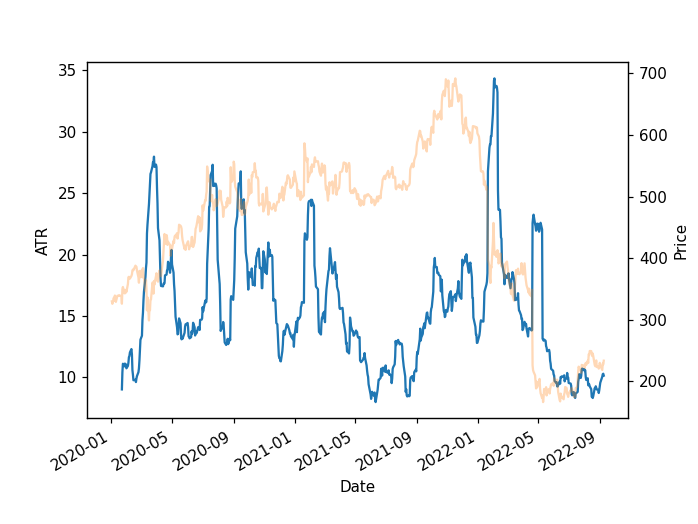

Text(0, 0.5, 'Price')

In [61]:
fig, ax = plt.subplots()
average_true_range.plot(ax=ax)
ax2 = data['Close'].plot(ax=ax, secondary_y=True, alpha=.3)
ax.set_ylabel("ATR")
ax2.set_ylabel("Price")


## Sharpe Ratio
* Represents both the risk and return
* Developed by William F Sharpe, used to help investors understand the return of an investment compared to its risk

### Formula
SR = ( Rp - Rf ) / (σ)
* SR: Sharpe ratio
* Rp: Return of portfolio
* Rf: risk free return (10 year treasury note)
* σ: standard deviation of portfolio

In [62]:
import numpy as np
import pandas_datareader as pdr
import datetime as dt
import pandas as pd

In [124]:
tickers = ['AAPL', 'MSFT', 'TWTR', 'IBM']
start = dt.datetime(2020,1,1)
data = pdr.get_data_yahoo(tickers,start)
data = data['Adj Close']

In [125]:
portfolio = [.25,.15,.40,.20]  #hypothetical portfolio distribution
data = data.dropna()    #removes all NaaN
np.sum(np.log(data/data.shift()), axis=1)     #normalizes

Date
2020-01-02    0.000000
2020-01-03   -0.054751
2020-01-06    0.012530
2020-01-07    0.014845
2020-01-08    0.055624
                ...   
2022-09-02   -0.044780
2022-09-06   -0.027174
2022-09-07    0.099816
2022-09-08    0.013587
2022-09-09    0.055062
Length: 678, dtype: float64

In [126]:
np.log(data/data.shift())*portfolio   #balanced portfolio

Symbols,AAPL,MSFT,TWTR,IBM
Date,,,,
2020-01-02,NaN,NaN,NaN,NaN
2020-01-03,-0.002442,-0.001879,-0.009778,-0.001601
2020-01-06,0.001984,0.000387,0.001520,-0.000358
2020-01-07,-0.001179,-0.001374,0.011219,0.000134
2020-01-08,0.003990,0.002370,0.006221,0.001662
...,...,...,...,...
2022-09-02,-0.003426,-0.002521,0.000104,-0.002905
2022-09-06,-0.002062,-0.001655,0.000207,-0.001682
2022-09-07,0.002303,0.002840,0.025557,0.001556


In [127]:
log_return = np.sum(np.log(data/data.shift())*portfolio, axis=1)   #log return of portfolio

In [128]:
log_return

Date
2020-01-02    0.000000
2020-01-03   -0.015701
2020-01-06    0.003534
2020-01-07    0.008801
2020-01-08    0.014243
                ...   
2022-09-02   -0.008749
2022-09-06   -0.005192
2022-09-07    0.032256
2022-09-08    0.005282
2022-09-09    0.012428
Length: 678, dtype: float64

In [129]:
import matplotlib.pyplot as plt
%matplotlib notebook

<IPython.core.display.Javascript object>


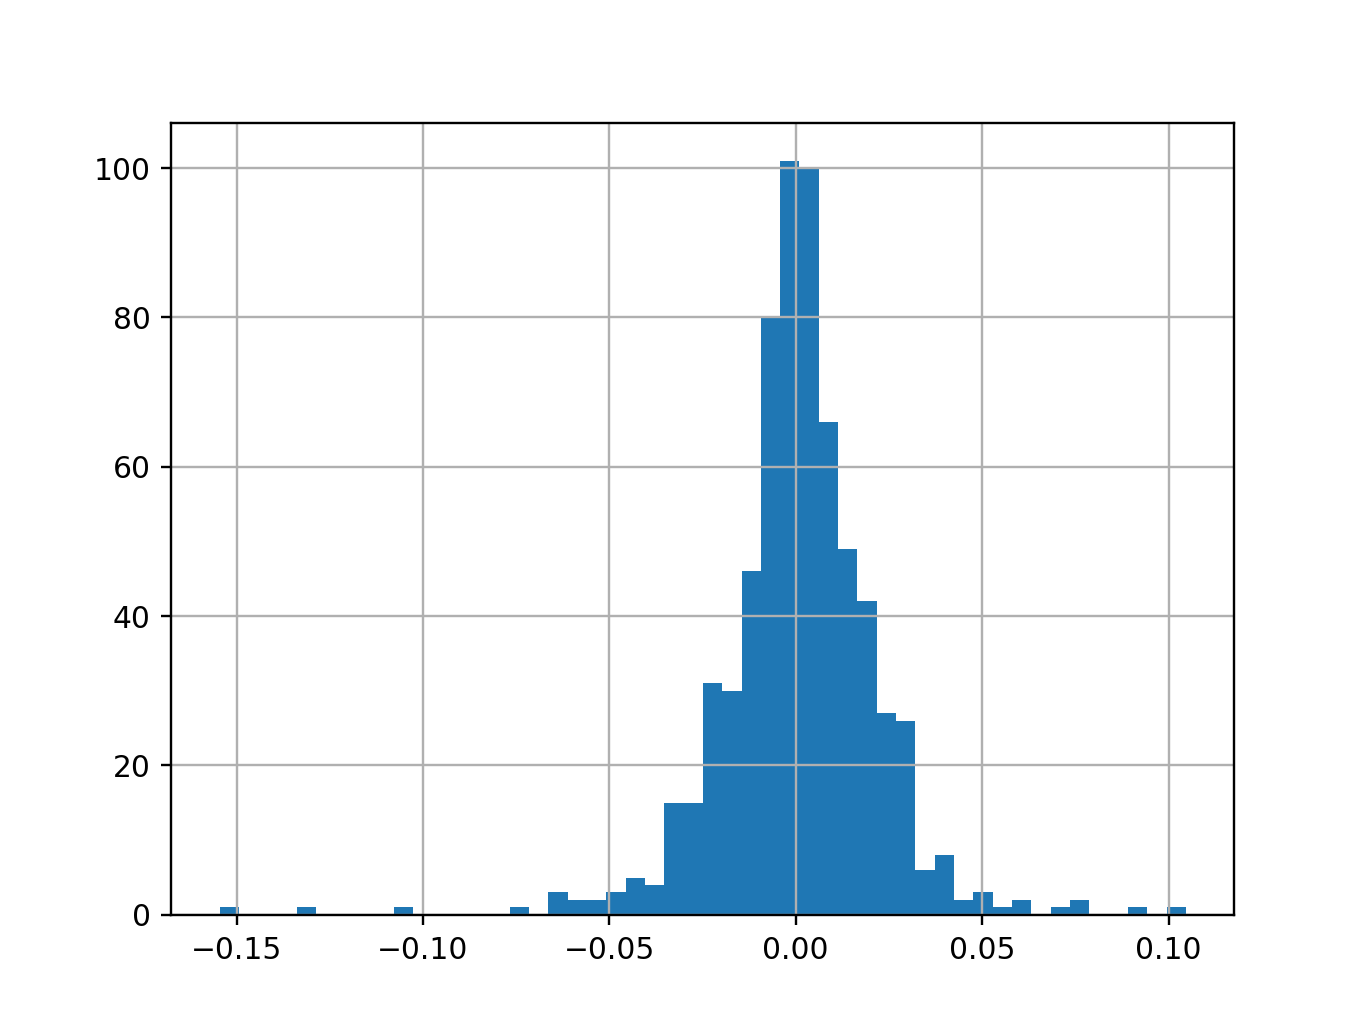

<AxesSubplot:>

In [130]:
fig, ax = plt.subplots()
log_return.hist(bins=50, ax=ax)

In [131]:
log_return.std()

0.021480463195231864

In [132]:
log_return.mean()

0.0005930452146389002

In [133]:
sharpe_ratio = log_return.mean()/log_return.std()
sharpe_ratio

0.02760858596245456

In [140]:
asr = sharpe_ratio*252**.5     #annualized sharpe ratio
asr

0.4382727150408216

In [141]:
weight = np.random.random(4)
weight /= weight.sum()
weight

array([0.30270543, 0.30969001, 0.33058909, 0.05701546])

In [142]:
log_return2 = np.sum(np.log(data/data.shift())*weight, axis=1)

In [143]:
sharpe_ratio2 = log_return2.mean()/log_return2.std()

In [144]:
asr2 = sharpe_ratio2*252**.5     #annualized sharpe ratio

In [145]:
asr2

0.5265798661466287